In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
IMAGE_PATH = "Screenshot 2024-11-27 181534.png"
IMAGE_PATH_2 = 'Screenshot 2024-11-27 152657.png'

## grayscale

In [3]:
def convert_to_grayscale(image):

    image_arary = np.array(image)
    if len(image_arary.shape) == 3:
        grayscale = (
            0.2989 * image_arary[:, :, 0]
            + 0.5870 * image_arary[:, :, 1]
            + 0.1140 * image_arary[:, :, 2]
        )
        return grayscale.astype(np.uint8)

    else:
        return image_arary
    

# def Gray_scale(image_path):
    
# # convert it to grayscale
#     img = Image.open(image_path).convert('L')
#     return img

## Threshold

In [4]:
def apply_threshold(gray_scale_image):
    threshold = np.mean(gray_scale_image)

    binary_image = np.where(gray_scale_image >= threshold, 255, 0)
    return binary_image.astype(np.uint8)

In [5]:
def calculate_histogram(grayscale_image):
    histogram = np.zeros(256, dtype=int)

    for value in grayscale_image.flatten():
        histogram[value] += 1

    return histogram

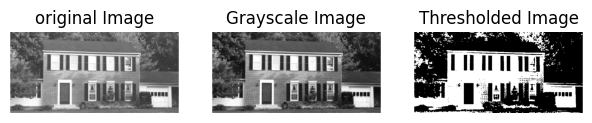

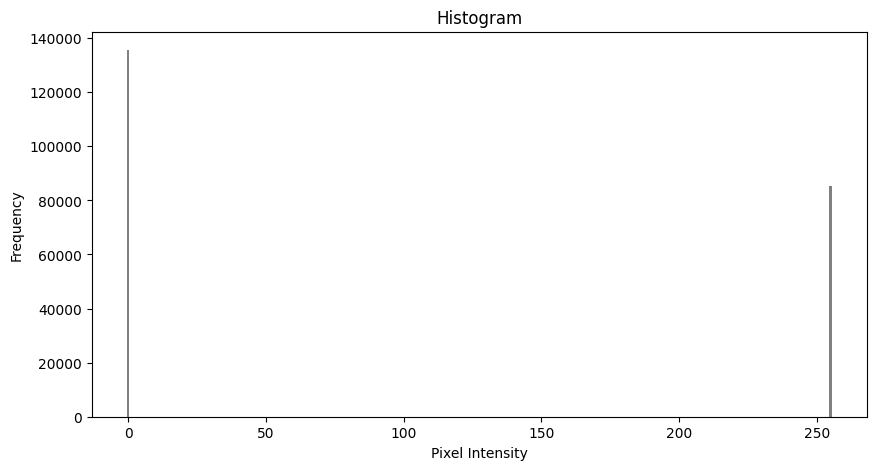

In [6]:
image = Image.open("./Screenshot 2024-11-27 181534.png")

grayscale = convert_to_grayscale(image)

binary = apply_threshold(grayscale)

histo_image = calculate_histogram(binary)

plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1)
plt.title("original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Grayscale Image")
plt.imshow(grayscale, cmap="gray")
plt.axis("off")




plt.subplot(1, 4, 3)
plt.title("Thresholded Image")
plt.imshow(binary, cmap="gray")
plt.axis("off")
plt.show()


plt.figure(figsize=(10, 5))
plt.bar(range(256), histo_image, color="gray")
plt.title("Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

## Halftoning

### simple halftoning

In [7]:
def simple_halftoning(grayscale_image, threshold=128):

    binary_image = np.where(grayscale_image >= threshold, 255, 0)
    return binary_image.astype(np.uint8)

In [8]:
def Advanced_halftoning(grayscale_image):
    rows, cols = grayscale_image.shape
    output_image = grayscale_image.copy()

    for i in range(rows):
        for j in range(cols):
            old_pixel = output_image[i, j]
            new_pixel = 255 if old_pixel > 128 else 0
            output_image[i, j] = new_pixel

            error = old_pixel - new_pixel

            if j + 1 < cols:
                output_image[i, j + 1] += (7 / 16) * error
            if i + 1 < rows and j - 1 >= 0:
                output_image[i + 1, j - 1] += (3 / 16) * error
            if i + 1 < rows:
                output_image[i + 1, j] += (5 / 16) * error
            if i + 1 < rows and j + 1 < cols:
                output_image[i + 1, j + 1] += (1 / 16) * error

    return np.clip(output_image, 0, 255).astype(np.uint8)

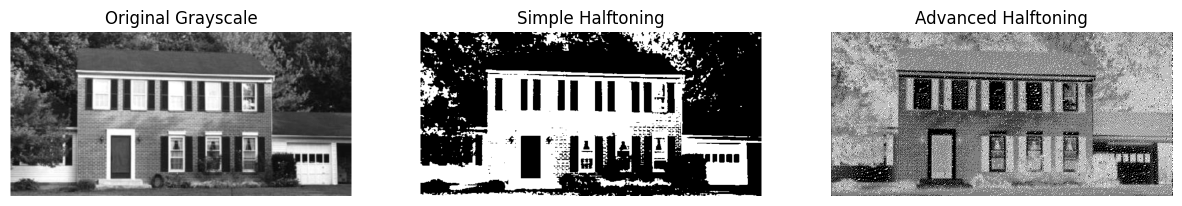

In [9]:
image = Image.open("./Screenshot 2024-11-27 181534.png").convert("L")
grayscale_array = np.array(image)

simple_binary = simple_halftoning(grayscale_array)

advanced_binary = Advanced_halftoning(grayscale_array)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original Grayscale")
plt.imshow(grayscale_array, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Simple Halftoning")
plt.imshow(simple_binary, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Advanced Halftoning")
plt.imshow(advanced_binary, cmap="gray")
plt.axis("off")

plt.show()

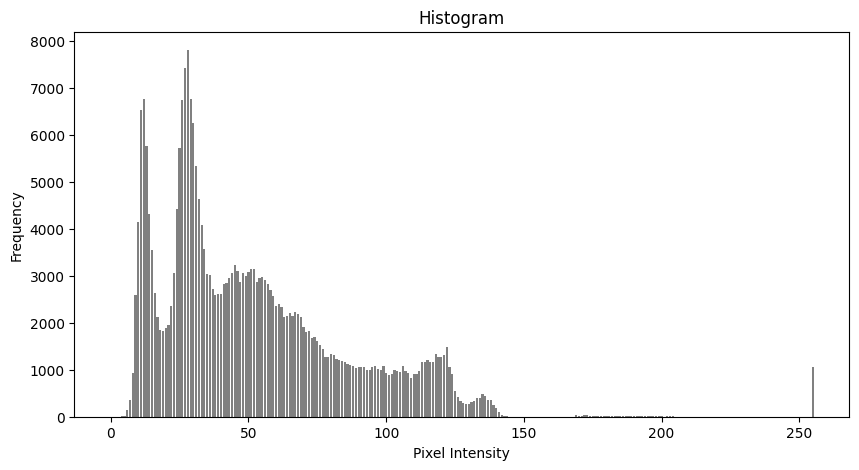

In [10]:
image = Image.open("Screenshot 2024-11-26 195719.png").convert("L")
grayscale_array = np.array(image)
histogram = calculate_histogram(grayscale_array)

plt.figure(figsize=(10, 5))
plt.bar(range(256), histogram, color="gray")
plt.title("Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

In [ ]:
def histogram_equalization(grayscale_image):
    
    
    histogram = calculate_histogram(grayscale_image)
    
    
    cumulative_histogram = [0] * len(histogram)
    cumulative_histogram[0] = histogram[0]
    for i in range(1, len(histogram)):
        cumulative_histogram[i] = cumulative_histogram[i - 1] + histogram[i]

    
    dm = 256  
    area = grayscale_image.shape[0] * grayscale_image.shape[1]  

    
    normalized_cumulative_histogram = []
    for value in cumulative_histogram:
        normalized_value = round((dm - 1) * (value / area))  
        normalized_cumulative_histogram.append(normalized_value)

    
    equalized_image = np.zeros_like(grayscale_image)
    rows, cols = grayscale_image.shape
    for i in range(rows):
        for j in range(cols):
            equalized_image[i, j] = int(normalized_cumulative_histogram[grayscale_image[i, j]])

    return (
        equalized_image.astype(np.uint8),
        histogram,
        cumulative_histogram,
        normalized_cumulative_histogram,
    )


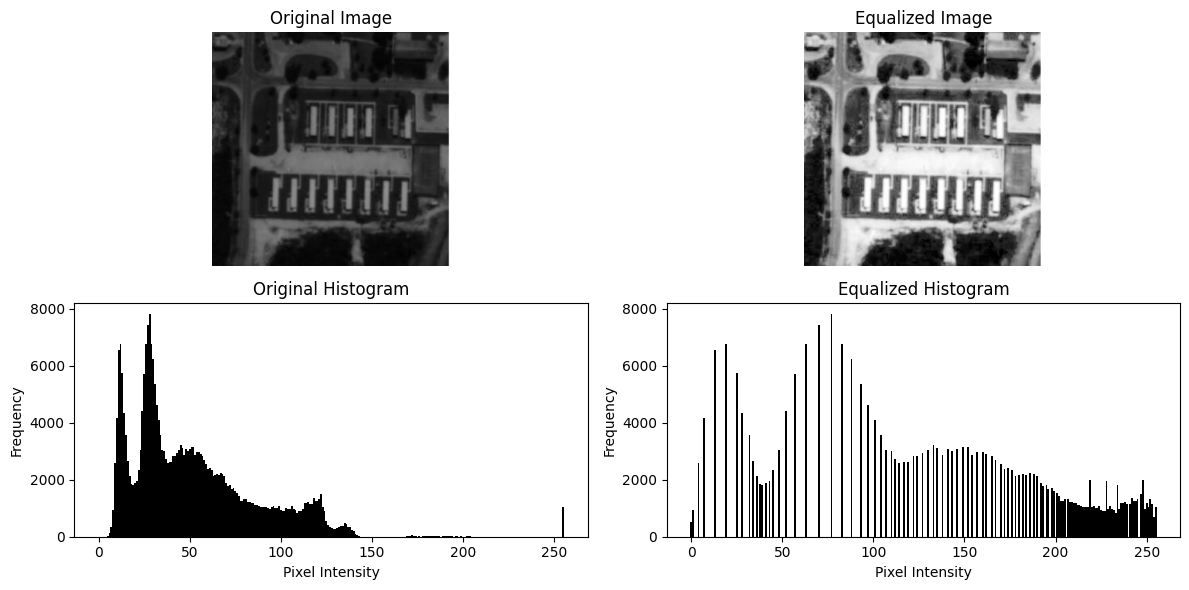

In [12]:
image = Image.open("Screenshot 2024-11-26 195719.png").convert("L")
grayscale_array = np.array(image)  # Convert to NumPy array

equalized_image, histogram, cumulative_histogram, normalized_cumulative_histogram = histogram_equalization(grayscale_array)
equalized_histogram = calculate_histogram(equalized_image)


plt.figure(figsize=(12, 6))


plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')


plt.subplot(2, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.axis('off')


plt.subplot(2, 2, 3)
plt.bar(range(256), histogram, color='black', width=1)
plt.title("Original Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")


plt.subplot(2, 2, 4)
plt.bar(range(256), equalized_histogram, color='black', width=1)
plt.title("Equalized Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()



## Simple Edge Detection Methods

### sobel operator

In [13]:
# def sobel_operator(grayscale_image, threshold=128):
#     Gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
#     Gy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

#     rows, cols = grayscale_image.shape
#     edge_image = np.zeros_like(grayscale_image)

#     for i in range(1, rows - 1):
#         for j in range(1, cols - 1):
#             region = grayscale_image[i - 1 : i + 2, j - 1 : j + 2]

#             gx = np.sum(Gx * region)
#             gy = np.sum(Gy * region)

#             magnitude = np.sqrt(gx**2 + gy**2)
#             #threshold += magnitude

#             edge_image[i, j] = 255 if magnitude > threshold else 0

#     return edge_image.astype(np.uint8)


In [20]:
def sobel_operator(grayscale_image):
    Gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    Gy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    rows, cols = grayscale_image.shape
    edge_image = np.zeros_like(grayscale_image)
    magnitudes = []

    
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            region = grayscale_image[i - 1 : i + 2, j - 1 : j + 2]

            gx = np.sum(Gx * region)
            gy = np.sum(Gy * region)

            magnitude = np.sqrt(gx**2 + gy**2)
            magnitudes.append(magnitude)

    
    threshold = np.mean(magnitudes)

   
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            region = grayscale_image[i - 1 : i + 2, j - 1 : j + 2]

            gx = np.sum(Gx * region)
            gy = np.sum(Gy * region)

            magnitude = np.sqrt(gx**2 + gy**2)
            edge_image[i, j] = 255 if magnitude > threshold else 0

    return edge_image.astype(np.uint8)


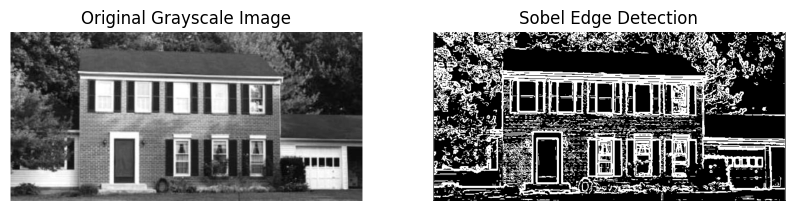

In [21]:
image = Image.open("./photo_5935863121010869518_x.jpg").convert("L")
grayscale_array = np.array(image)

sobel_edges = sobel_operator(grayscale_array)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(grayscale_array, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Sobel Edge Detection")
plt.imshow(sobel_edges, cmap="gray")
plt.axis("off")

plt.show()

## Prewitt operator

In [16]:
def prewitt_operator(grayscale_image):
    Gx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    Gy = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

    rows, cols = grayscale_image.shape
    edge_image = np.zeros_like(grayscale_image)
    magnitudes = []

    # Compute gradient magnitudes
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            region = grayscale_image[i - 1 : i + 2, j - 1 : j + 2]

            gx = np.sum(Gx * region)
            gy = np.sum(Gy * region)

            magnitude = np.sqrt(gx**2 + gy**2)
            magnitudes.append(magnitude)

    
    threshold = np.mean(magnitudes)

    
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            region = grayscale_image[i - 1 : i + 2, j - 1 : j + 2]

            gx = np.sum(Gx * region)
            gy = np.sum(Gy * region)

            magnitude = np.sqrt(gx**2 + gy**2)
            edge_image[i, j] = 255 if magnitude > threshold else 0

    return edge_image.astype(np.uint8)


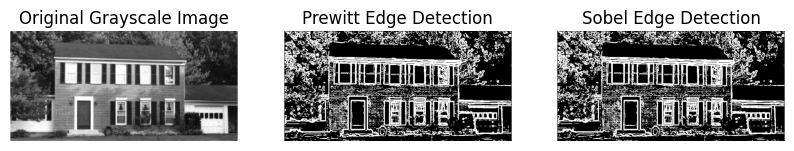

In [17]:
image = Image.open("./Screenshot 2024-11-27 181534.png").convert("L")
grayscale_array = np.array(image)

prewitt_edges = prewitt_operator(grayscale_array)
sobel_edges = sobel_operator(grayscale_array)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Original Grayscale Image")
plt.imshow(grayscale_array, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Prewitt Edge Detection")
plt.imshow(prewitt_edges, cmap="gray")
plt.axis("off")


plt.subplot(1, 3, 3)
plt.title("Sobel Edge Detection")
plt.imshow(sobel_edges, cmap="gray")
plt.axis("off")


plt.show()


In [18]:
def kirsch_compass_masks(grayscale_image, threshold=128):

    kirsch_masks = [
        np.array([[-3, -3, 5], [-3, 0, 5], [-3, -3, 5]]),  # North
        np.array([[-3, 5, 5], [-3, 0, 5], [-3, -3, -3]]),  # North-East
        np.array([[5, 5, 5], [-3, 0, -3], [-3, -3, -3]]),  # East
        np.array([[5, 5, -3], [5, 0, -3], [-3, -3, -3]]),  # South-East
        np.array([[5, -3, -3], [5, 0, -3], [5, -3, -3]]),  # South
        np.array([[-3, -3, -3], [5, 0, -3], [5, 5, -3]]),  # South-West
        np.array([[-3, -3, -3], [-3, 0, -3], [5, 5, 5]]),  # West
        np.array([[-3, -3, -3], [-3, 0, 5], [-3, 5, 5]]),  # North-West
    ]

    rows, cols = grayscale_image.shape
    edge_image = np.zeros_like(grayscale_image)
    direction_image = np.zeros_like(grayscale_image, dtype=int)
    
    for i in range(1, rows - 1):  
        for j in range(1, cols - 1):
            region = grayscale_image[i - 1 : i + 2, j - 1 : j + 2]

            responses = [np.sum(mask * region) for mask in kirsch_masks]

            max_response = max(responses)
            max_direction = responses.index(max_response)

            edge_image[i, j] = 255 if max_response > threshold else 0
            direction_image[i, j] = max_direction
            
    return edge_image.astype(np.uint8), direction_image


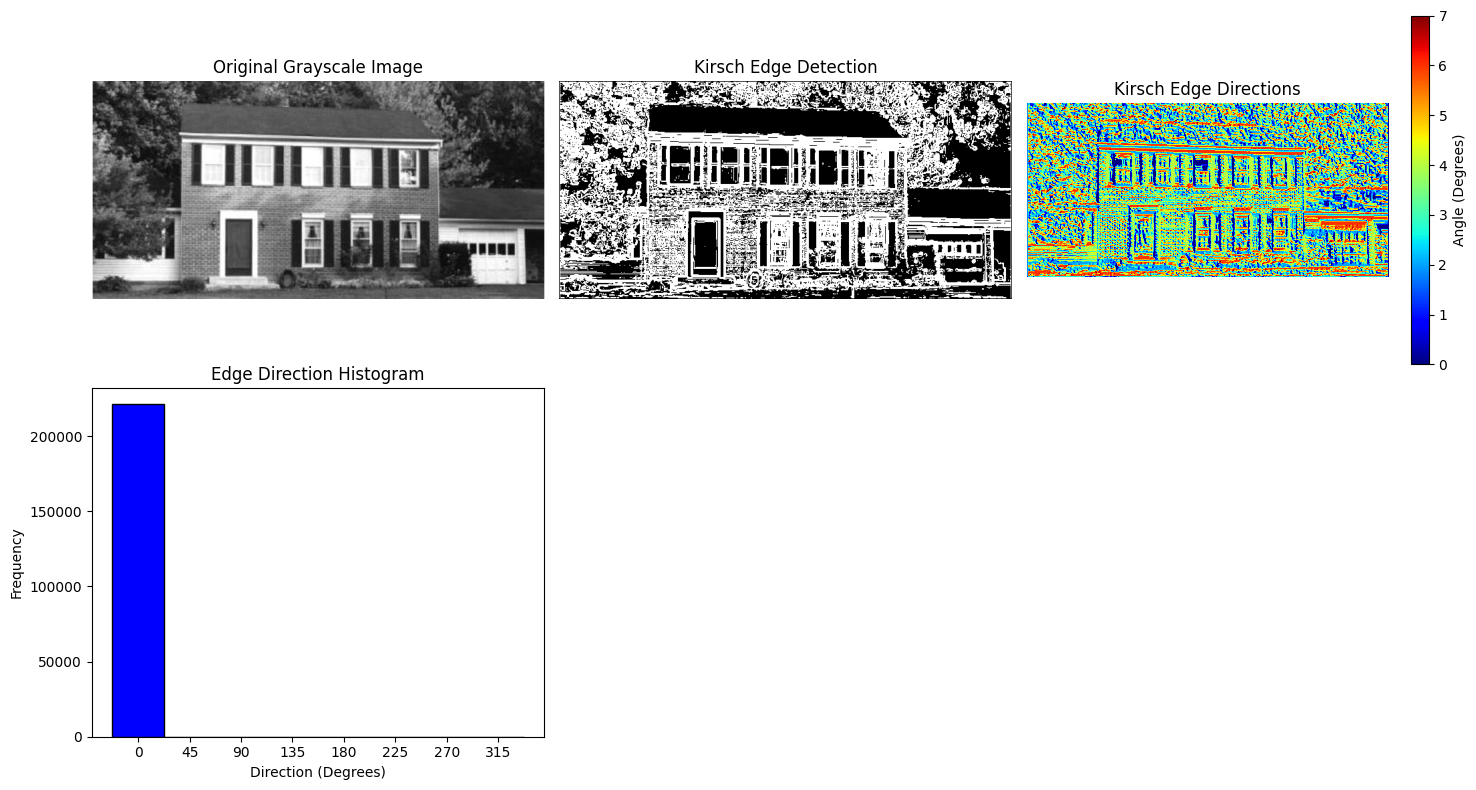

In [19]:
image = Image.open("./Screenshot 2024-11-27 181534.png").convert("L")
grayscale_array = np.array(image)

kirsch_edges, kirsch_directions = kirsch_compass_masks(grayscale_array)

plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.title("Original Grayscale Image")
plt.imshow(grayscale_array, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.title("Kirsch Edge Detection")
plt.imshow(kirsch_edges, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.title("Kirsch Edge Directions")
plt.imshow(kirsch_directions, cmap="jet")  
plt.colorbar(label="Angle (Degrees)")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.title("Edge Direction Histogram")
valid_directions = kirsch_directions[~np.isnan(kirsch_directions)]  
plt.hist(valid_directions, bins=np.arange(-22.5, 361, 45), color="blue", edgecolor="black", align="mid")
plt.xticks(np.arange(0, 360, 45))
plt.xlabel("Direction (Degrees)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## Advanced Edge Detection Methods

## Homogeneity Operator

In [20]:
def homogeneity_operator(grayscale_image, threshold=128):

    rows, cols = grayscale_image.shape
    edge_image = np.zeros_like(grayscale_image)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            neighborhood = grayscale_image[i - 1 : i + 2, j - 1 : j + 2]
            center_pixel = grayscale_image[i, j]

            differences = np.abs(neighborhood - center_pixel)

            max_difference = np.max(differences)

            edge_image[i, j] = 255 if max_difference > threshold else 0

    return edge_image.astype(np.uint8)

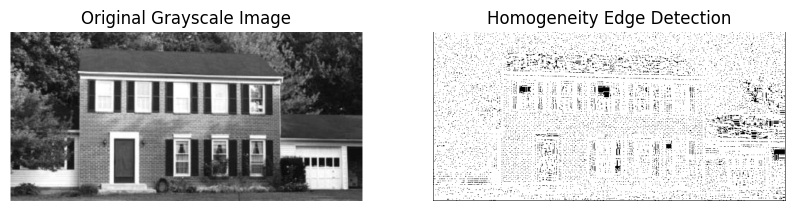

In [21]:
image = Image.open("./Screenshot 2024-11-27 181534.png").convert("L")
grayscale_array = np.array(image)


homogeneity_edges = homogeneity_operator(grayscale_array)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(grayscale_array, cmap="gray")
plt.axis("off")


plt.subplot(1, 2, 2)
plt.title("Homogeneity Edge Detection")
plt.imshow(homogeneity_edges, cmap="gray")
plt.axis("off")

plt.show()

## Difference Operator

In [22]:
def difference_operator(grayscale_image, threshold=128):

    rows, cols = grayscale_image.shape
    edge_image = np.zeros_like(grayscale_image)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            region = grayscale_image[i - 1 : i + 2, j - 1 : j + 2]

            differences = [
                abs(region[0, 0] - region[2, 2]),
                abs(region[2, 0] - region[0, 2]),
                abs(region[1, 0] - region[1, 2]),
                abs(region[0, 1] - region[2, 1]),
            ]

            max_difference = max(differences)

            edge_image[i, j] = 255 if max_difference > threshold else 0

    return edge_image.astype(np.uint8)


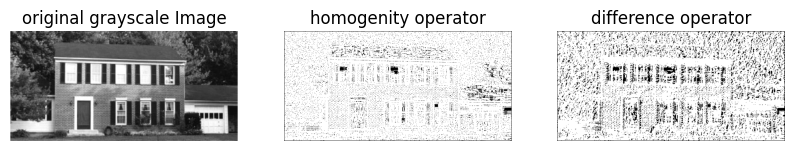

In [23]:
image = Image.open("./Screenshot 2024-11-27 181534.png").convert("L")

grayscale_array = np.array(image)

difference_edges_pairs = difference_operator(grayscale_array)
homogenity_edges = homogeneity_operator(grayscale_array)


plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("original grayscale Image")
plt.imshow(grayscale_array, cmap="gray")
plt.axis("off")


plt.subplot(1, 3, 2)
plt.title("homogenity operator")
plt.imshow(homogenity_edges, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("difference operator")
plt.imshow(difference_edges_pairs, cmap="gray")
plt.axis("off")


plt.show()

## Difference of Gaussian

In [24]:
import cv2
def difference_of_guassians(image, kernel1, kernel2):

    smoothed1 = cv2.filter2D(image, -1, kernel1)
    smoothed2 = cv2.filter2D(image, -1, kernel2)


    dog_result = smoothed1 - smoothed2

    return np.clip(dog_result, 0, 255).astype(np.uint8),smoothed1,smoothed2


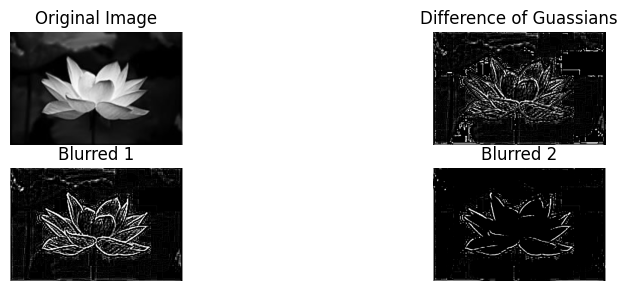

In [25]:
image = Image.open("./Screenshot 2024-11-27 152657.png").convert("L")
grayscale_array = np.array(image)


kernel7 = np.array(
    [
        [0, 0, -1, -1, -1, 0, 0],
        [0, -2, -3, -3, -3, -2, 0],
        [-1, -3, 5, 5, 5, -3, -1],
        [-1, -3, 5, 16, 5, -3, -1],
        [-1, -3, 5, 5, 5, -3, -1],
        [0, -2, -3, -3, -3, -2, 0],
        [0, 0, -1, -1, -1, 0, 0],
    ]
)

kernel9 = np.array(
    [
        [0, 0, 0, -1, -1, -1, 0, 0, 0],
        [0, -2, -3, -3, -3, -3, -3, -2, 0],
        [0, -3, -2, -1, -1, -1, -2, -3, 0],
        [-1, -3, -1, 9, 9, 9, -1, -3, -1],
        [-1, -3, -1, 9, 19, 9, -1, -3, -1],
        [-1, -3, -1, 9, 9, 9, -1, -3, -1],
        [0, -3, -2, -1, -1, -1, -2, -3, 0],
        [0, -2, -3, -3, -3, -3, -3, -2, 0],
        [0, 0, 0, -1, -1, -1, 0, 0, 0],
    ]
)


dog_image,smoothed1,smoothed2 = difference_of_guassians(grayscale_array, kernel7, kernel9)


plt.figure(figsize=(10, 5))
plt.subplot(3, 2, 1)
plt.title("Original Image")
plt.imshow(grayscale_array, cmap="gray")
plt.axis("off")

plt.subplot(3, 2, 2)
plt.title("Difference of Guassians")
plt.imshow(dog_image, cmap="gray")
plt.axis("off")



plt.subplot(3, 2, 3)
plt.title('Blurred 1')
plt.imshow(smoothed1, cmap='gray')
plt.axis('off')


plt.subplot(3, 2, 4)
plt.title('Blurred 2')
plt.imshow(smoothed2, cmap='gray')
plt.axis('off')


plt.show()

### contrast based edge detector


In [26]:
# edge_mask = np.array([[-1, 0, -1],
# [0,  4, 0],
# [-1, 0, -1]], dtype=np.float32)

In [27]:
# def contrast_filter(image):
#     mask = edge_mask
#     smoothing_mask = np.ones((3,3)) / 9
#     output_edge = cv2.filter2D(image,-1,mask)
#     avg_output = cv2.filter2D(image,-1,smoothing_mask).astype(float)
#     avg_output += 1e-5
#     contrast_img = output_edge / avg_output
#     return contrast_img,output_edge,avg_output




# image = cv2.imread('Screenshot 2024-11-27 181534.png', cv2.IMREAD_GRAYSCALE)


# res_2,edg_out,avg_out = contrast_filter(image)


# plt.figure(figsize=(10, 5))



# plt.subplot(3, 2, 1)
# plt.title('Original Image')
# plt.imshow(image, cmap='gray')
# plt.axis('off')


# plt.subplot(3, 2, 2)
# plt.title('Contrast Filter')
# plt.imshow(res_2, cmap='gray')
# plt.axis('off')


# plt.subplot(3, 2, 3)
# plt.title('Output_Edge')
# plt.imshow(edg_out, cmap='gray')
# plt.axis('off')


# plt.subplot(3, 2, 4)
# plt.title('Avg_Output')
# plt.imshow(avg_out, cmap='gray')
# plt.axis('off')


# plt.tight_layout()
# plt.show()
    
    

In [28]:
def contrast_based_edge_detection_with_edge_detector(image, threshold=15):

    smoothing_mask = (1 / 9) * np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

    smoothed_image = cv2.filter2D(image, -1,smoothing_mask)

    edge_detector_mask = np.array([[-1, 0, -1], [0, 4, 0], [-1, 0, -1]])

    edge_response = cv2.filter2D(smoothed_image,-1, edge_detector_mask)

    edges = np.where(edge_response > threshold, 255, 0)

    return edges.astype(np.uint8)


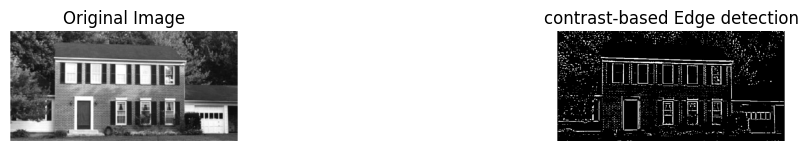

In [29]:
# For GUI
image = Image.open("./Screenshot 2024-11-27 181534.png").convert("L")
grayscale_array = np.array(image)



contrast_edges2 = contrast_based_edge_detection_with_edge_detector(
    grayscale_array, threshold=20
)
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(grayscale_array, cmap="gray")
plt.axis("off")


plt.subplot(1, 3, 3)
plt.title("contrast-based Edge detection")
plt.imshow(contrast_edges2, cmap="gray")
plt.axis("off")


plt.show()


## Variance

In [30]:
# def variance_mask(image):
#     output_image = np.zeros_like(image)
#     h, w = image.shape
#     for i in range(1, h-1):
#         for j in range(1, w-1):
#             neighborhood = image[i-1:i+2, j-1:j+2]
#             mean = np.mean(neighborhood)
#             var = np.sum((neighborhood - mean) ** 2) / 9
#             output_image[i, j] = var
#     return output_image

# image = cv2.imread("./Screenshot 2024-11-27 181534.png", cv2.IMREAD_GRAYSCALE)


# var_img = variance_mask(image)


# plt.figure(figsize=(10, 5))



# plt.subplot(1, 2, 1)
# plt.title('Original Image')
# plt.imshow(image, cmap='gray')
# plt.axis('off')   


# plt.subplot(1, 2, 2)
# plt.title('Variance Image')
# plt.imshow(var_img, cmap='gray')
# plt.axis('off') 



# plt.tight_layout()
# plt.show()
    

In [31]:
## For GUI
def variance_edge_detector(image, region_size=3, threshold=50):
    pad = region_size // 2

    padded_image = np.pad(image, pad, mode="constant", constant_values=0)

    rows, cols = image.shape
    edge_image = np.zeros_like(image)

    for i in range(pad, rows + pad):
        for j in range(pad, cols + pad):

            region = padded_image[i - pad : i + pad + 1, j - pad : j + pad + 1]

            mean_intensity = np.mean(region)

            variance = np.mean((region - mean_intensity) ** 2)

            edge_image[i - pad, j - pad] = 255 if variance > threshold else 0

    return edge_image.astype(np.uint8)


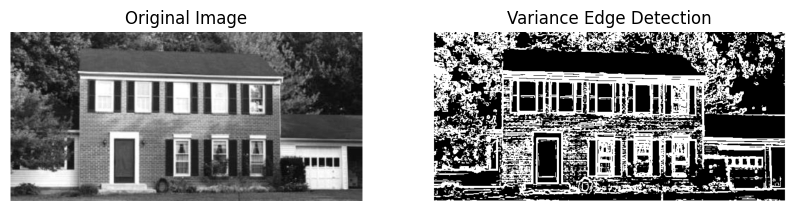

In [32]:
image = Image.open("./Screenshot 2024-11-27 181534.png").convert("L")
grayscale_array = np.array(image)

variance_edges = variance_edge_detector(grayscale_array, region_size=3, threshold=50)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(grayscale_array, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Variance Edge Detection")
plt.imshow(variance_edges, cmap="gray")
plt.axis("off")

plt.show()

## Range Detector

In [33]:
# def range_mask(image):
#     output_image = np.zeros_like(image)
#     h, w = image.shape
#     for i in range(1, h-1):
#         for j in range(1, w-1):
#             neighborhood = image[i-1:i+2, j-1:j+2]
#             range_v = np.max(neighborhood) - np.min(neighborhood)
#             output_image[i,j] = range_v
#     return output_image


# image = cv2.imread("./Screenshot 2024-11-27 181534.png", cv2.IMREAD_GRAYSCALE)


# range_img = range_mask(image)


# plt.figure(figsize=(10, 5))



# plt.subplot(1, 2, 1)
# plt.title('Original Image')
# plt.imshow(image, cmap='gray')
# plt.axis('off')   


# plt.subplot(1, 2, 2)
# plt.title('Range Image')
# plt.imshow(range_img, cmap='gray')
# plt.axis('off') 



# plt.tight_layout()
# plt.show()
    
    

In [34]:
# For GUI
def range_edge_detector(image, region_size=3, threshold=50):
    pad = region_size // 2

    padded_image = np.pad(image, pad, mode="constant", constant_values=0)

    rows, cols = image.shape
    edge_image = np.zeros_like(image)

    for i in range(pad, rows + pad):
        for j in range(pad, cols + pad):

            region = padded_image[i - pad : i + pad + 1, j - pad : j + pad + 1]

            intensity_range = np.max(region) - np.min(region)

            edge_image[i - pad, j - pad] = 255 if intensity_range > threshold else 0

    return edge_image.astype(np.uint8)


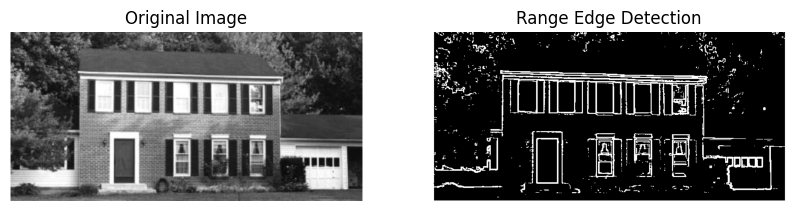

In [35]:
image = Image.open("./Screenshot 2024-11-27 181534.png").convert("L")
grayscale_array = np.array(image)

range_edges = range_edge_detector(grayscale_array, region_size=3, threshold=50)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(grayscale_array, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Range Edge Detection")
plt.imshow(range_edges, cmap="gray")
plt.axis("off")

plt.show()

## Filter

## High Pass Filter

In [36]:
def high_pass_filter(image):

    high_pass_mask = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])


    filtered_image = cv2.filter2D(image, -1,high_pass_mask)

    filtered_image = np.clip(filtered_image, 0, 255)

    return filtered_image.astype(np.uint8)


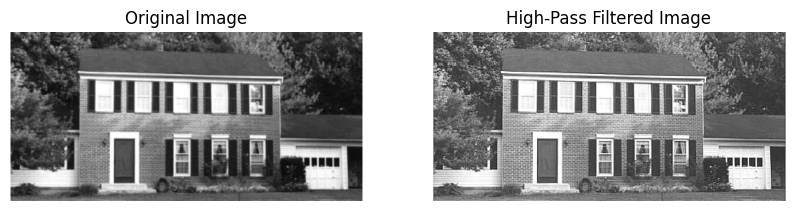

In [37]:
image = Image.open("./Screenshot 2024-11-27 181534.png").convert("L")
grayscale_array = np.array(image)

high_pass_result = high_pass_filter(grayscale_array)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(grayscale_array, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("High-Pass Filtered Image")
plt.imshow(high_pass_result, cmap="gray")
plt.axis("off")

plt.show()

In [38]:
def low_pass_filter(image):

    low_pass_mask = (1 / 6) * np.array([[0, 1, 0], [1, 2, 1], [0, 1, 0]])

#     filtered_image = manual_convolution(image, low_pass_mask)
    filtered_image = cv2.filter2D(image, -1,low_pass_mask)

    filtered_image = np.clip(filtered_image, 0, 255)

    return filtered_image.astype(np.uint8)


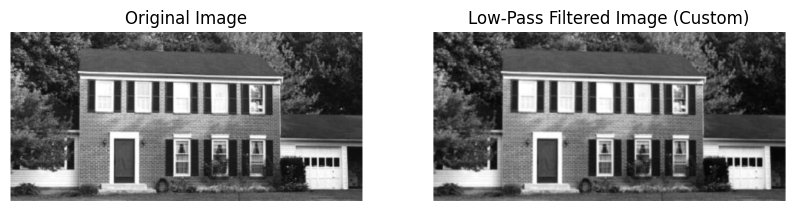

In [39]:
image = Image.open("./Screenshot 2024-11-27 181534.png").convert("L")
grayscale_array = np.array(image)

low_pass_result_custom = low_pass_filter(grayscale_array)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(grayscale_array, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Low-Pass Filtered Image (Custom)")
plt.imshow(low_pass_result_custom, cmap="gray")
plt.axis("off")

plt.show()

In [40]:
def median_filter(image, region_size=3):

    pad = region_size // 2

    padded_image = np.pad(image, pad, mode="constant", constant_values=0)

    rows, cols = image.shape
    filtered_image = np.zeros_like(image)

    for i in range(pad, rows + pad):
        for j in range(pad, cols + pad):

            region = padded_image[i - pad : i + pad + 1, j - pad : j + pad + 1]

            median_value = np.median(region)

            filtered_image[i - pad, j - pad] = median_value

    return filtered_image.astype(np.uint8)


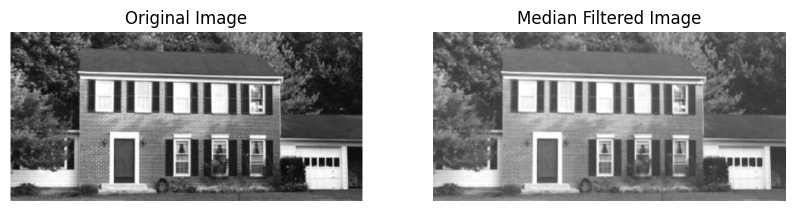

In [41]:
image = Image.open("./Screenshot 2024-11-27 181534.png").convert("L")
grayscale_array = np.array(image)

median_filtered_image = median_filter(grayscale_array, region_size=3)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(grayscale_array, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Median Filtered Image")
plt.imshow(median_filtered_image, cmap="gray")
plt.axis("off")

plt.show()

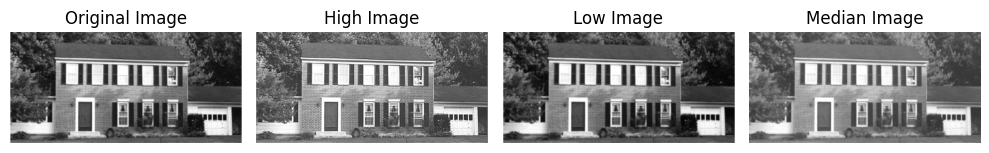

In [43]:

plt.figure(figsize=(10, 5))



plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')   


plt.subplot(1, 4, 2)
plt.title('High Image')
plt.imshow(high_pass_result, cmap='gray')
plt.axis('off') 



plt.subplot(1, 4, 3)
plt.title('Low Image')
plt.imshow(low_pass_result_custom, cmap='gray')
plt.axis('off') 




plt.subplot(1, 4, 4)
plt.title('Median Image')
plt.imshow(median_filtered_image, cmap='gray')
plt.axis('off') 



plt.tight_layout()
plt.show()

In [44]:
# def add_images(img1, img2):
    
#     # Ensure both images are of the same size by resizing img2 to match img1
#     img2_resized = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
    
#     height, width = img1.shape
#     new_img = np.zeros((height, width), dtype=np.uint8)
    
#     for i in range(height):
#         for j in range(width):
#             # Add pixel values and clamp between 0 and 255
#             new_img[i, j] = max(0, min(img1[i, j] + img2_resized[i, j], 255))
    
#     return new_img


# img1 = cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE)
# img2 = cv2.imread(IMAGE_PATH_2, cv2.IMREAD_GRAYSCALE)


# if img1 is None or img2 is None:
#     raise FileNotFoundError("One or both image files could not be loaded. Check the file paths.")


# result_image = add_images(img1, img2)

# plt.figure(figsize=(15, 5))


# plt.subplot(1, 3, 1)
# plt.title('Image 1')
# plt.imshow(img1, cmap='gray')
# plt.axis('off')


# plt.subplot(1, 3, 2)
# plt.title('Image 2')
# plt.imshow(img2, cmap='gray')
# plt.axis('off')


# plt.subplot(1, 3, 3)
# plt.title('Added Image')
# plt.imshow(result_image, cmap='gray')
# plt.axis('off')

# plt.tight_layout()
# plt.show()


In [45]:
def add_imagess(image):
    image_copy = image.copy()
    added_image = image + image_copy
    return np.clip(added_image, 0, 255).astype(np.uint8)


def subtract_imagess(image):
    image_copy = image.copy()
    subtracted_image = image_copy - image

    return np.clip(subtracted_image, 0, 255).astype(np.uint8)


def invert_image(image):
    invert_image = 255 - image
    return invert_image.astype(np.uint8)

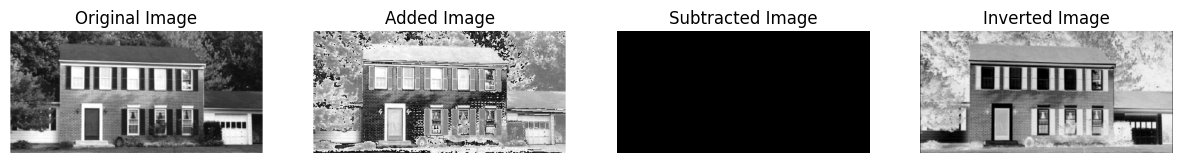

In [46]:
# For GUI
image = Image.open("./Screenshot 2024-11-27 181534.png").convert("L")
grayscale_array = np.array(image)

added_image = add_imagess(grayscale_array)
subtracted_image = subtract_imagess(grayscale_array)
inverted_image = invert_image(grayscale_array)


plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(grayscale_array, cmap="gray")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Added Image")
plt.imshow(added_image, cmap="gray")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Subtracted Image")
plt.imshow(subtracted_image, cmap="gray")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title("Inverted Image")
plt.imshow(inverted_image, cmap="gray")
plt.axis("off")

plt.show()

In [47]:
def manual_histogram_segmentation(image, thresholds):

    thresholds = sorted(thresholds)
    segmented_image = np.zeros_like(image)

    for i, threshold in enumerate(thresholds):
        segmented_image[image <= threshold] = (i + 1) * 50
        image = np.where(image > threshold, image, 0)

        segmented_image[image > 0] = (len(thresholds) + 1) * 50

        return segmented_image

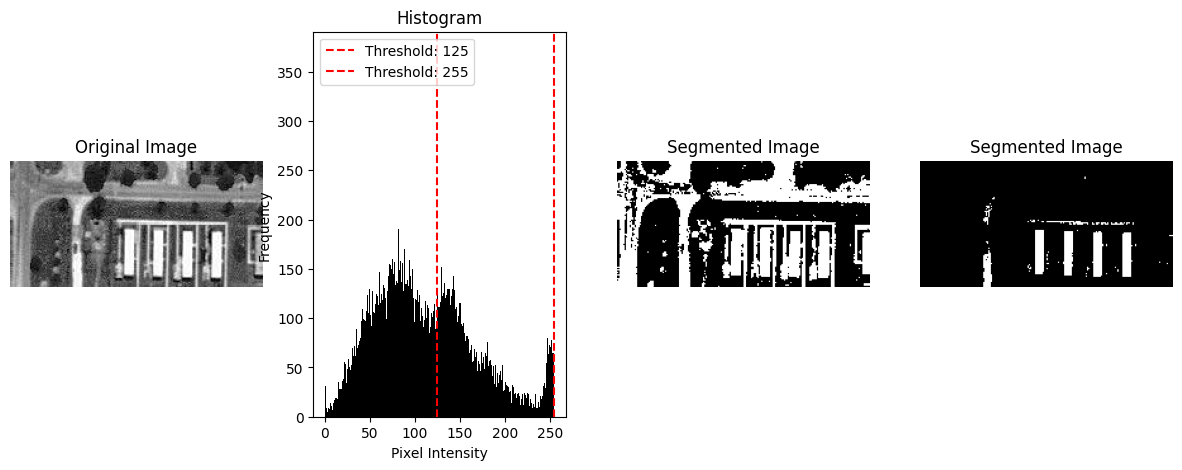

In [48]:
image = Image.open('photo_5935863121010869511_m.jpg').convert("L")
grayscale_array = np.array(image)

thresholds = [125, 255]
thresholds2 = [225, 255]

segmented_image = manual_histogram_segmentation(grayscale_array, thresholds)
segmented_image2 = manual_histogram_segmentation(grayscale_array, thresholds2)


plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(grayscale_array, cmap="gray")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Histogram")
plt.hist(grayscale_array.flatten(), bins=256, range=(0, 255), color="black")
for t in thresholds:
    plt.axvline(t, color="red", linestyle="--", label=f"Threshold: {t}")
plt.legend()
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(1, 4, 3)
plt.title("Segmented Image")
plt.imshow(segmented_image, cmap="gray")
plt.axis("off")


plt.subplot(1, 4, 4)
plt.title("Segmented Image")
plt.imshow(segmented_image2, cmap="gray")
plt.axis("off")

plt.show()

## Histogram Peak Technique

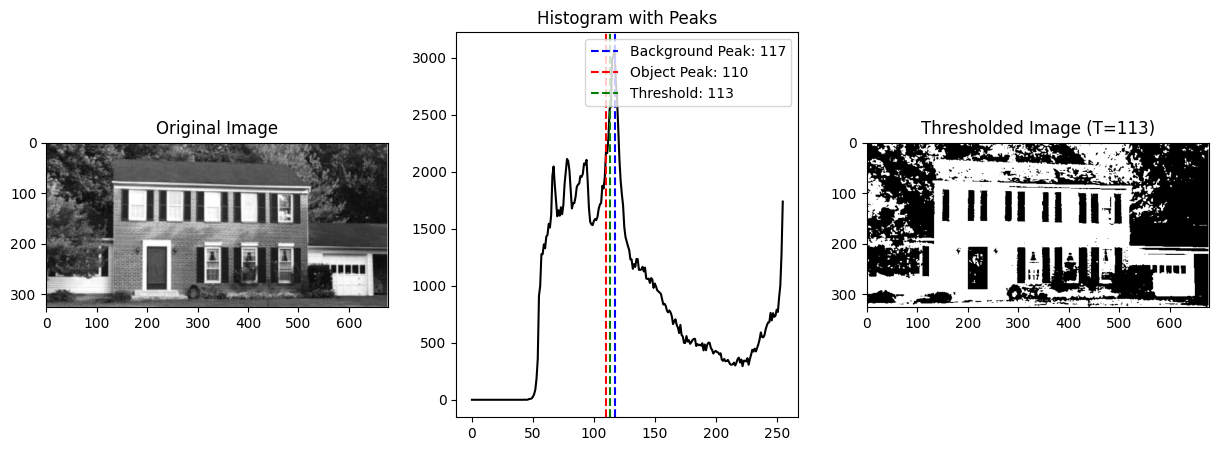

In [49]:
def histogram_peak_thresholding(image):
    
   
    histogram = np.zeros(256, dtype=int)
    for pixel in image.ravel():  # Flatten the image into a 1D array
        histogram[pixel] += 1

    
    peaks = []
    for i in range(1, len(histogram) - 1):
        if histogram[i] > histogram[i - 1] and histogram[i] > histogram[i + 1]:
            peaks.append(i)

    
    peaks = sorted(peaks, key=lambda x: histogram[x], reverse=True)

    
    if len(peaks) < 2:
        raise ValueError("Not enough peaks found in histogram!")
    background_peak = peaks[0]
    object_peak = peaks[1]

    
    threshold = (background_peak + object_peak) // 2

    
    binary_image = ((image > threshold) * 255).astype(np.uint8)

    return binary_image, threshold, histogram, background_peak, object_peak


grayscale_image = cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE)


thresholded_img, threshold, histogram, bg_peak, obj_peak = histogram_peak_thresholding(grayscale_image)


plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(grayscale_image, cmap="gray")


plt.subplot(1, 3, 2)
plt.title("Histogram with Peaks")
plt.plot(histogram, color="black")
plt.axvline(x=bg_peak, color="blue", linestyle="--", label=f"Background Peak: {bg_peak}")
plt.axvline(x=obj_peak, color="red", linestyle="--", label=f"Object Peak: {obj_peak}")
plt.axvline(x=threshold, color="green", linestyle="--", label=f"Threshold: {threshold}")
plt.legend()


plt.subplot(1, 3, 3)
plt.title(f"Thresholded Image (T={threshold})")
plt.imshow(thresholded_img, cmap="gray")

plt.show()


## Histogram Valley Technique

In [50]:
def manual_peak_detection(histogram):
    peaks = []

    for i in range(1, len(histogram) - 1):
        if histogram[i] > histogram[i - 1] and histogram[i] > histogram[i + 1]:
            peaks.append(i)

    return peaks


In [51]:
def valley_based_segmentation(image):
  
    histogram = calculate_histogram(image)

    all_peaks = manual_peak_detection(histogram)

    prominent_peaks = sorted(all_peaks, key=lambda x: histogram[x], reverse=True)

    if len(prominent_peaks) < 2:
        raise ValueError("Not enough peaks detected to calculate a valley.")
    peak1, peak2 = prominent_peaks[:2]

    start, end = min(peak1, peak2), max(peak1, peak2)
    print(f"Selected Peaks -> Peak 1: {peak1}, Peak 2: {peak2}, Range: {start} to {end}")  # Debugging Output

    valley_range = histogram[start:end + 1]
    if len(valley_range) == 0:
        raise ValueError("Invalid valley range. Check peaks and histogram.")
    valley = np.argmin(valley_range) + start
    print(f"Valley Detected: {valley}") 

    segmented_image = np.zeros_like(image)
    segmented_image[image <= valley] = 50  
    segmented_image[image > valley] = 255  

    return segmented_image, histogram, (peak1, peak2), valley


Selected Peaks -> Peak 1: 117, Peak 2: 110, Range: 110 to 117
Valley Detected: 111


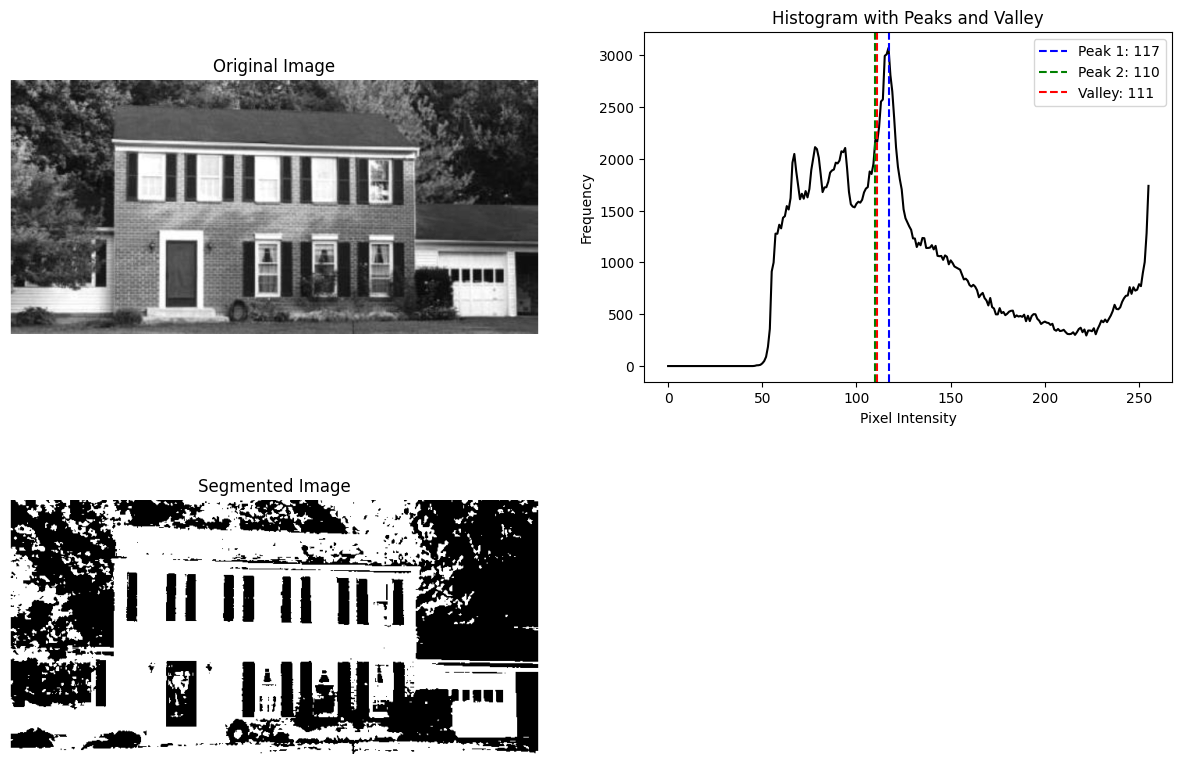

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

image = Image.open("./Screenshot 2024-11-27 181534.png").convert("L")
grayscale_array = np.array(image)

segmented_image, histogram, peaks, valley = valley_based_segmentation(grayscale_array)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(grayscale_array, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("Histogram with Peaks and Valley")
plt.plot(histogram, color="black")
plt.axvline(peaks[0], color="blue", linestyle="--", label=f"Peak 1: {peaks[0]}")
plt.axvline(peaks[1], color="green", linestyle="--", label=f"Peak 2: {peaks[1]}")
plt.axvline(valley, color="red", linestyle="--", label=f"Valley: {valley}")
plt.legend()
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(2, 2, 3)
plt.title("Segmented Image")
plt.imshow(segmented_image, cmap="gray")
plt.axis("off")

plt.show()


### adaptive histogram technique

In [53]:
def adaptive_histogram_segmentation(image):
    
    
    histogram = calculate_histogram(image)

    
    all_peaks = manual_peak_detection(histogram)

    
    prominent_peaks = sorted(all_peaks, key=lambda x: histogram[x], reverse=True)

    if len(prominent_peaks) < 2:
        raise ValueError("Not enough peaks detected for adaptive segmentation.")
    
    peak1, peak2 = prominent_peaks[:2]

    
    start, end = min(peak1, peak2), max(peak1, peak2)
    valley = np.argmin(histogram[start:end + 1]) + start

    
    segmented_image = np.zeros_like(image)
    segmented_image[image <= valley] = 50  # Background
    segmented_image[image > valley] = 255  # Object

    
    background_mean = np.mean(image[segmented_image == 50])
    object_mean = np.mean(image[segmented_image == 255])
    
    
    new_threshold = (background_mean + object_mean) // 2

    
    final_segmented_image = np.zeros_like(image)
    final_segmented_image[image <= new_threshold] = 50  # Background
    final_segmented_image[image > new_threshold] = 255  # Object

    return {
        "final_segmented_image": final_segmented_image,
        "histogram": histogram,
        "all_peaks": all_peaks,
        "prominent_peaks": (peak1, peak2),
        "valley": valley,
        "background_mean": background_mean,
        "object_mean": object_mean,
        "new_threshold": new_threshold,
    }


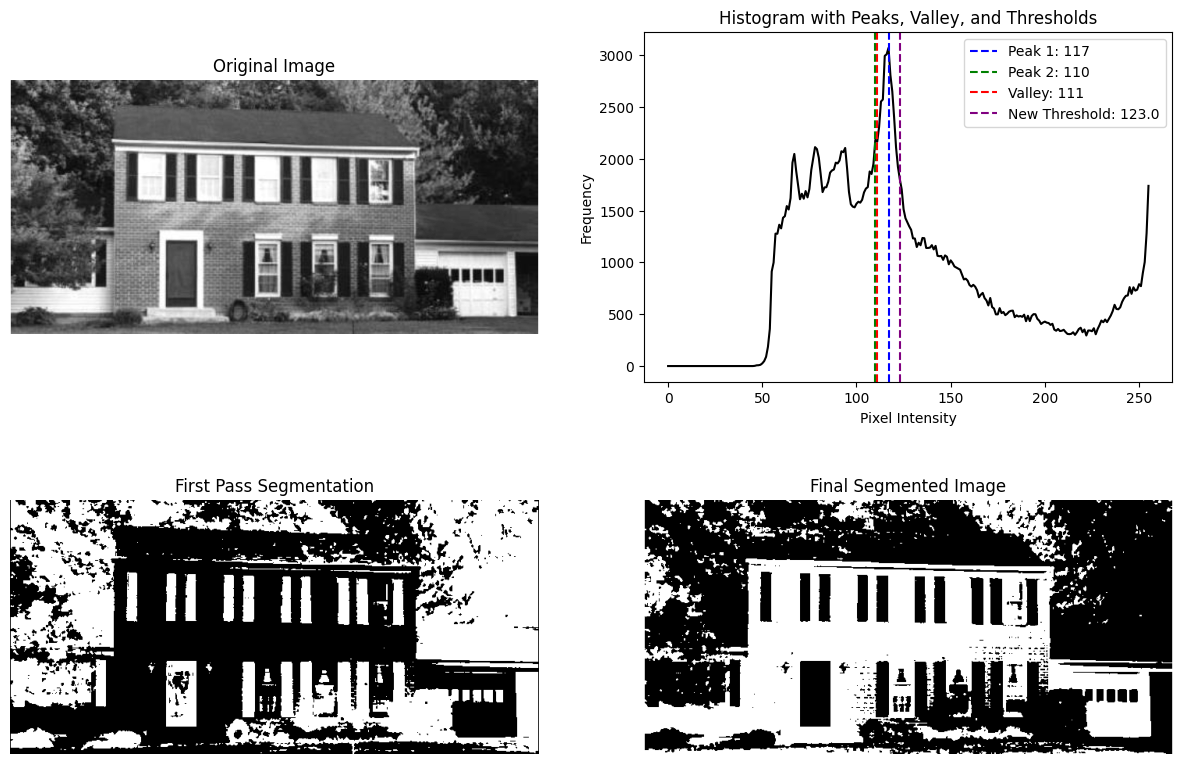

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


image = Image.open("./Screenshot 2024-11-27 181534.png").convert("L")
grayscale_array = np.array(image)


results = adaptive_histogram_segmentation(grayscale_array)


final_segmented_image = results["final_segmented_image"]
histogram = results["histogram"]
prominent_peaks = results["prominent_peaks"]
valley = results["valley"]
new_threshold = results["new_threshold"]


plt.figure(figsize=(15, 10))


plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(grayscale_array, cmap="gray")
plt.axis("off")


plt.subplot(2, 2, 2)
plt.title("Histogram with Peaks, Valley, and Thresholds")
plt.plot(histogram, color="black")
plt.axvline(prominent_peaks[0], color="blue", linestyle="--", label=f"Peak 1: {prominent_peaks[0]}")
plt.axvline(prominent_peaks[1], color="green", linestyle="--", label=f"Peak 2: {prominent_peaks[1]}")
plt.axvline(valley, color="red", linestyle="--", label=f"Valley: {valley}")
plt.axvline(new_threshold, color="purple", linestyle="--", label=f"New Threshold: {new_threshold}")
plt.legend()
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")


plt.subplot(2, 2, 3)
plt.title("First Pass Segmentation")
plt.imshow((grayscale_array <= valley).astype(np.uint8) * 255, cmap="gray")
plt.axis("off")


plt.subplot(2, 2, 4)
plt.title("Final Segmented Image")
plt.imshow(final_segmented_image, cmap="gray")
plt.axis("off")

plt.show()


In [59]:
jupyter nbconvert --to python project.ipynb

SyntaxError: invalid syntax (579400108.py, line 1)

In [58]:
pip install jupytext

     ---------------------------------------- 0.0/153.5 kB ? eta -:--:--
     ------- ------------------------------- 30.7/153.5 kB 1.3 MB/s eta 0:00:01
     --------- --------------------------- 41.0/153.5 kB 393.8 kB/s eta 0:00:01
     ---------------------- -------------- 92.2/153.5 kB 655.4 kB/s eta 0:00:01
     ------------------------ ----------- 102.4/153.5 kB 535.8 kB/s eta 0:00:01
     ------------------------------------ 153.5/153.5 kB 705.9 kB/s eta 0:00:00
     ---------------------------------------- 0.0/55.3 kB ? eta -:--:--
     ---------------------------------------- 55.3/55.3 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/87.5 kB ? eta -:--:--
     ---------------------------------------- 87.5/87.5 kB 4.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
